In [1]:
import pandas
import numpy as np

In [2]:
drug = pandas.read_csv("drug.csv")
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,NaN,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NaN,14.020,drugX


In [3]:
# Check for missing values

missing_values = drug.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64


In [4]:
# remove missing values
drug.dropna(inplace=True)
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
...,...,...,...,...,...,...
194,46,F,HIGH,HIGH,34.686,drugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX


In [5]:
# Encode categorical variable
from sklearn.preprocessing import LabelEncoder

categorical_features = ["Sex", "BP", "Cholesterol", "Drug"]
for feature in categorical_features:
    le = LabelEncoder()
    drug[feature] = le.fit_transform(drug[feature])

print("<---- Data after remove missing values ---->")
drug


<---- Data after remove missing values ---->


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
4,61,0,1,0,18.043,4
5,22,0,2,0,8.607,3
...,...,...,...,...,...,...
194,46,0,0,0,34.686,4
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3


In [6]:
# Split the data into features and target 
X = drug.drop("Drug", axis=1)
Y = drug["Drug"]

In [7]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
4,61,0,1,0,18.043
5,22,0,2,0,8.607
...,...,...,...,...,...
194,46,0,0,0,34.686
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894


In [57]:
# Experiment with Fixed Train-Test Split Ratio
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics  import accuracy_score
from sklearn.tree import DecisionTreeClassifier


num_experiments = 5
accuracies = []
tree_sizes = []
for i in range(num_experiments):
    random_state_split = random.randint(1, 1000)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state_split )

    model = DecisionTreeClassifier(random_state=142)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Get the size of the decision tree
    tree_size = model.tree_.node_count
    tree_sizes.append(tree_size)
print("tree sizes : " ,  tree_sizes)
print("accuracies : " ,  accuracies)
print("max size : ",max(tree_sizes))   
print("max accuracy : ",max(accuracies))   



tree sizes :  [11, 11, 11, 11, 11]
accuracies :  [1.0, 0.9661016949152542, 1.0, 1.0, 1.0]
max size :  11
max accuracy :  1.0


In [9]:
# Define the range of training set sizes
train_sizes = [0.3, 0.4, 0.5, 0.6 ,0.7]


mean_accuracies = []
max_accuracies = []
min_accuracies = []
mean_tree_sizes = []
max_tree_sizes = []
min_tree_sizes = []

for train_size in train_sizes:
    accuracies = []
    tree_sizes = []

    for seed in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_size, random_state=seed)

        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, y_train)

        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)

        tree_size = model.tree_.node_count
        tree_sizes.append(tree_size)

    mean_accuracies.append(np.mean(accuracies))
    max_accuracies.append(np.max(accuracies))
    min_accuracies.append(np.min(accuracies))
    mean_tree_sizes.append(np.mean(tree_sizes))
    max_tree_sizes.append(np.max(tree_sizes))
    min_tree_sizes.append(np.min(tree_sizes))


report_df = pandas.DataFrame({
    "Training Set Size": train_sizes,
    "Mean Accuracy": mean_accuracies,
    "Max Accuracy": max_accuracies,
    "Min Accuracy": min_accuracies,
    "Mean Tree Size": mean_tree_sizes,
    "Max Tree Size": max_tree_sizes,
    "Min Tree Size": min_tree_sizes
})

for i in range(5):
    print("train_sizes",max(train_sizes)) 
    

print(report_df)

train_sizes 0.7
train_sizes 0.7
train_sizes 0.7
train_sizes 0.7
train_sizes 0.7
   Training Set Size  Mean Accuracy  Max Accuracy  Min Accuracy  \
0                0.3       0.937226      0.992701      0.854015   
1                0.4       0.952137      1.000000      0.820513   
2                0.5       0.979592      0.989796      0.969388   
3                0.6       0.979487      1.000000      0.961538   
4                0.7       0.993220      1.000000      0.983051   

   Mean Tree Size  Max Tree Size  Min Tree Size  
0            11.8             13             11  
1            11.4             13             11  
2            11.0             11             11  
3            11.0             11             11  
4            11.0             11             11  


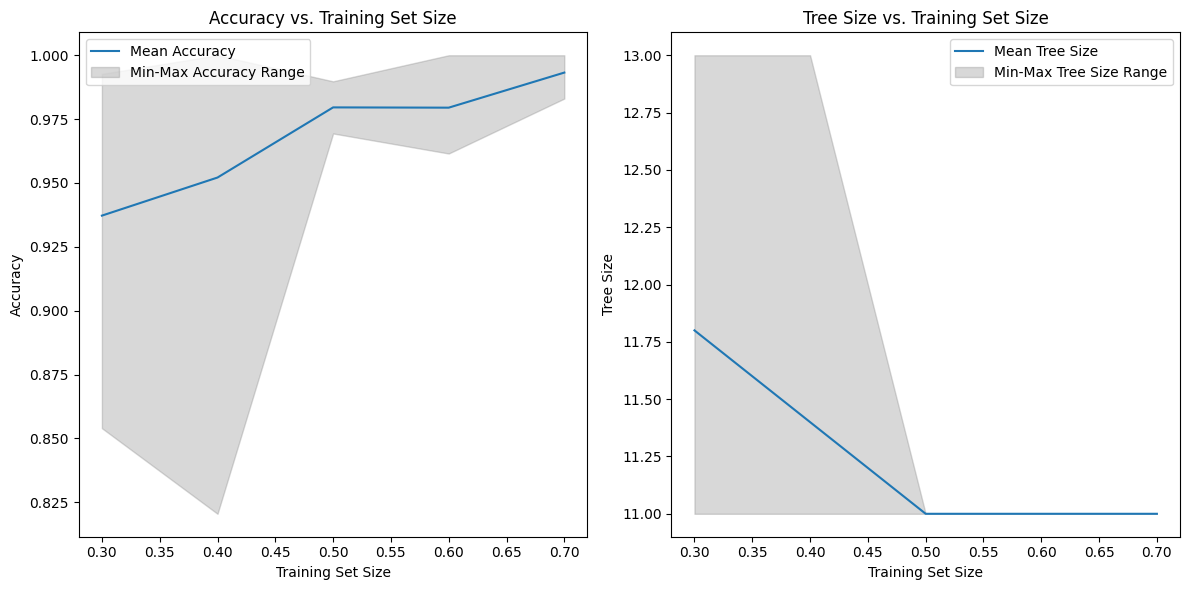

In [10]:

# Create plots
from matplotlib import pyplot as plt


plt.figure(figsize=(12, 6))

# Plot accuracy vs training set size
plt.subplot(1, 2, 1)
plt.plot(train_sizes, mean_accuracies, label='Mean Accuracy')
plt.fill_between(train_sizes, min_accuracies, max_accuracies, color='gray', alpha=0.3, label='Min-Max Accuracy Range')
plt.title('Accuracy vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

# Plot tree size vs training set size
plt.subplot(1, 2, 2)
plt.plot(train_sizes, mean_tree_sizes, label='Mean Tree Size')
plt.fill_between(train_sizes, min_tree_sizes, max_tree_sizes, color='gray', alpha=0.3, label='Min-Max Tree Size Range')
plt.title('Tree Size vs. Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Tree Size')
plt.legend()

plt.tight_layout()
plt.show()